In [1]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as pyplot
from mshr import *
import dolfin as fn

# Paramètres de la montagne D'Agnesi

In [16]:
alpha = 30
height = 1.0
u_0 = 1.0 # vent horizontal initial
epsi = 10**-6
Larg = 100 # largeur medium montagne

/usr/lib/python3/dist-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'interactive'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


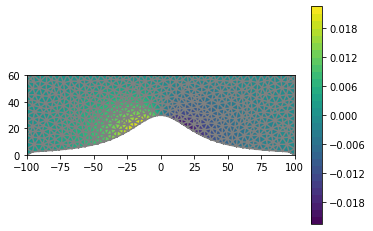

In [19]:
mesh = fn.Mesh('inv.xml')
markers = fn.MeshFunction("size_t", mesh, 'inv_physical_region.xml')
dx = fn.Measure('dx', domain=mesh, subdomain_data=markers)


plot(mesh)
V = FunctionSpace(mesh, 'P', 1)



# Define boundary condition
# '  x[1]>alpha*height +1?0:-2*height*alpha*alpha*x[0]/(pow( (x[0]*x[0]+ alpha*alpha) ,2))'

u_D = Expression('abs(x[0]-Larg)<epsi or abs(x[0]+Larg)<epsi? 0:   x[1]>alpha*height +1? 0 : -2*height*alpha*alpha*x[0]/(pow( (x[0]*x[0]+ alpha*alpha) ,2))',
                 degree = 3,
                 alpha= alpha, height=height, epsi = epsi, Larg=Larg)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem 
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
cte = Constant(0.000004) #vitesse horizontale ~ 4.4m/s, et fréquence N ~ 0.012s-1 -> 0.002727 ?
a = - dot(grad(u), grad(v))*dx + cte*cte*u*v*dx
L = f*v*dx # 0

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
p = plot(u)
pyplot.colorbar(p)# Hold plot
plt.show()
